<a href="https://colab.research.google.com/github/Methe11/Hotel-Booking-Analysis/blob/main/Aishwarya_Methe_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Data Description:

hotel : Hotel (Resort Hotel or City Hotel)

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC – no meal package BB – Bed & Breakfast HB – Half board (breakfast and one other meal – usually dinner) FB – Full board (breakfast, lunch and dinner) country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made Non Refund * a deposit was made in the value of the total stay cost Refundable – a deposit was made with a value under the total cost of stay. agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it Group – when the booking is associated to a group Transient – when the booking is not part of a group or contract, and is not associated to other transient booking Transient-party – when the booking is transient, but is associated to at least other transient booking adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories:

Canceled – booking was canceled by the customer Check-Out – customer has checked in but already departed No-Show – customer did not check-in and did inform the hotel of the reason why reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
#cheaking tail of datase
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#cheaking tail  of dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Chaking shape of dataset
df.shape

(119390, 32)

In [ ]:
#cheaking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#names of columns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# checking the summary of statitics 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# checking if our data contain some missing order
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# Removing outliers from adr column

In [ ]:
#dropping dataset where adr is greater than 1000
df= df.drop(df[df['adr']>1000].index)
# dropping data where adr is leaa than zero
df = df.drop(df[df['adr']<0].index)

# Filling missing values

In [ ]:
#filling missing values
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['country'].fillna('others',inplace=True)
df['children'].fillna(0,inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
#cheking how many duplicated values present in out dataset
df.duplicated().value_counts()

False    87394
True     31994
dtype: int64

In [ ]:
#droping all duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().value_counts()

False    87394
dtype: int64

# Feature Engineering

In [ ]:
#creating new features 
df['total_people']=df['adults']+df['babies']+df['children']
df['total_stay']=df['stays_in_week_nights'] +df['stays_in_weekend_nights']

# Now lets try to finds out solution of below questions:

1.What is the percentage of booking done in different hotels?

2.How many repeated guest arrived hotel?

3.How many percentage of customers booked hotel using each market segment or which market segment use to book hotel mostly?

4.which distribution channel use to book hotel mostly or how many customer use each distribution channel to book hotel?

5.How many customer book hotel with no deposite or which deposite type mostly preferd by the customers?

How many car parking are required by the customer.

# Univarient Analysis

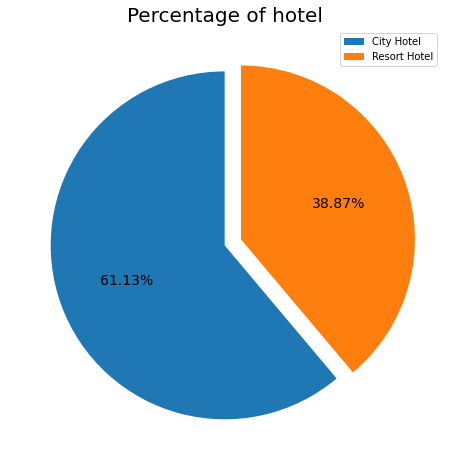

In [ ]:
#percentage distribution og hotel booking of customers
plt.figure(figsize=(12,8))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of hotel', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :10 })

Conclusion

1 As we can see in the following pie chart there are 61.13 % of prefered to stay in city hotels.

2 And 38.87 % peoples prefered to stay in Resort Hotel.

3 no of bookig in more in city hotel as compared to the resort Hotel.

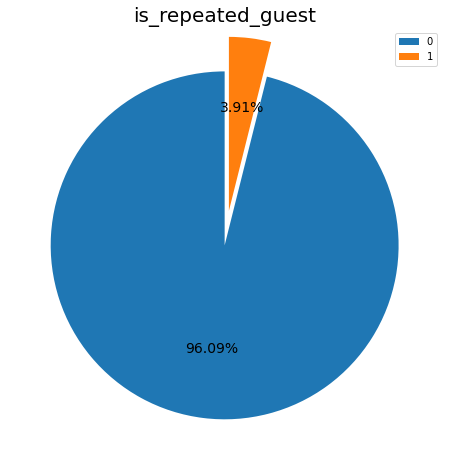

In [ ]:
#how many repeted customers present in dataset
plt.figure(figsize=(12,8))
labels = df['is_repeated_guest'].value_counts().index.tolist()
sizes = df['is_repeated_guest'].value_counts().tolist()
explode = (0, 0.2)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('is_repeated_guest', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :10 })

Conclusion

1 From the above pie chart we can conclude that only 3.91 % guests are repeated and 96.09 % guest are new in our dataset.

2 Hence we can say that customer rentention of the hotel is very less.

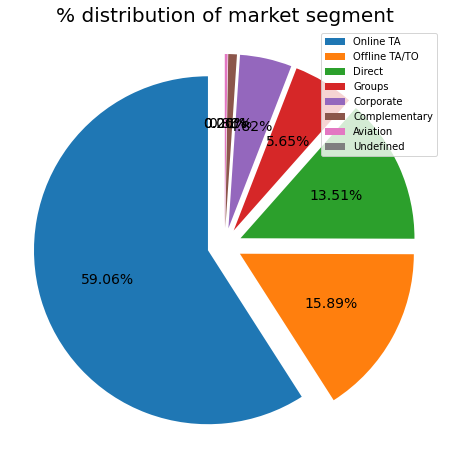

In [ ]:
#percentage distribution of market segment use to book hotel
plt.figure(figsize=(12,8))
labels = df['market_segment'].value_counts().index.tolist()
sizes = df['market_segment'].value_counts().tolist()
explode = (0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('% distribution of market segment', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :10 })

Conclusion

1Above pie chart shows the percentage distribution of market segment use to book hotel.

2Most number of people book hotel using online TA

3After that Offline TA/TD and Direct segment is mostly use to book hotel.

4complementary and aviation chanel is least use to book hotel.

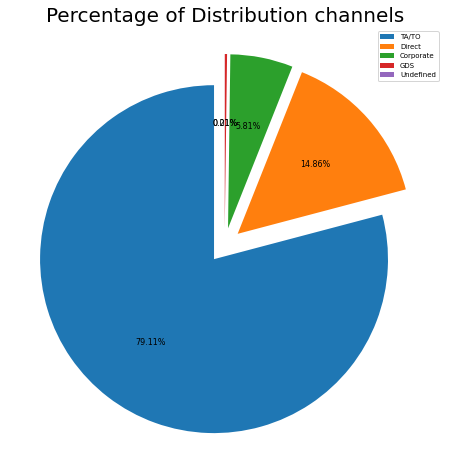

In [ ]:
# percentage distribution of distribution chanel use to book hotel by the customers
plt.figure(figsize=(12,8))
labels = df['distribution_channel'].value_counts().index.tolist()
sizes = df['distribution_channel'].value_counts().tolist()
explode = (0.1, 0.1,0.1,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of Distribution channels', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion

1 Following pie chart shows the percentage distribution of channel use to book hotels

2 As we can see that TA/TO distribution channel is widly use for booking after that Direct channel is used for booking mostly and GDS channel is least used distribution channel for hotel booking.

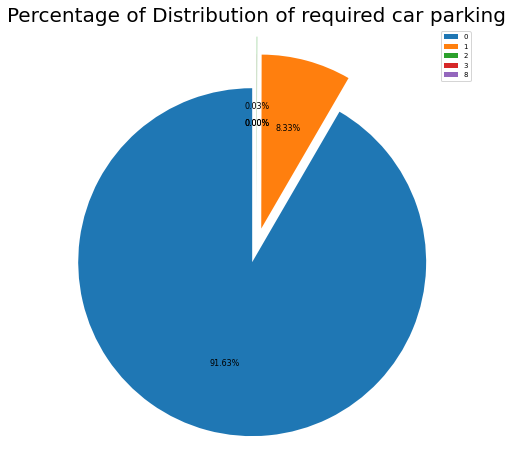

In [ ]:
#distribution of required car parking by the customers
plt.figure(figsize=(12,8))
labels = df['required_car_parking_spaces'].value_counts().index.tolist()
sizes = df['required_car_parking_spaces'].value_counts().tolist()
explode = (0.1, 0.1,0.2,0.1,0.1)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of Distribution of required car parking', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion

1 As we cn see in the following pie chart there are 91.63 % customers doesn't require any car parking spaces.

2 8.33 % of custemers requires only 1 car parking spaces.

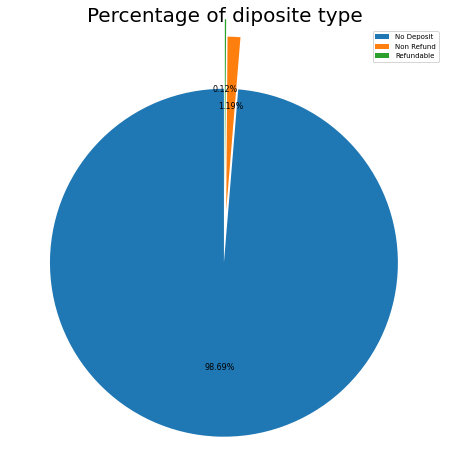

In [ ]:
#distribution of deposite type
plt.figure(figsize=(12,8))
labels = df['deposit_type'].value_counts().index.tolist()
sizes = df['deposit_type'].value_counts().tolist()
explode = (0.1,0.2,0.3)
plt.pie(sizes, explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.title('Percentage of diposite type', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' :7 })

Conclusion

1 Most of the customers prefered No deposit to book hotel.

# Trying to find out questions below

6.How many total booking done in diffrent year or In which year most booking are done and in that year which hotel booking was done mostly?

7.How many booking are done in each month and in which season higher booking are done?

8.How many booking are cancelled in each month?

9.In weekday how many nights customer booked hotel or prefer to stay in each hote?

10.In weekend nights how many customers booked hotel or prefer to stay in each hotel?

11.when a hotel receive more number of special request.

12.Which reserved room type customer preferd to stay in hotel.

13.Which type of meal is more prefered by the customer and which is least?

# Bivarient and multi varient analysis

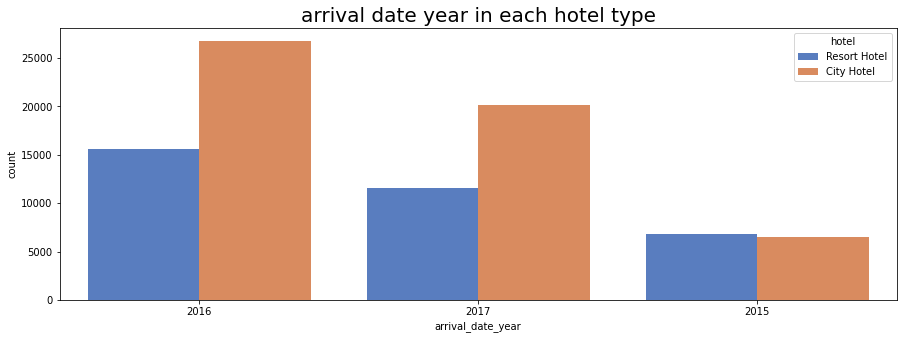

In [ ]:
#countplot for number of customer in each year
plt.figure(figsize=(15,5))
sns.countplot(x = 'arrival_date_year',
              data = df,hue='hotel',
              order = df['arrival_date_year'].value_counts().index,palette="muted").set_title('arrival date year in each hotel type', y=1, fontsize=20)

plt.show()

Conclusion

1 As we can se in the above bar graph Most customers booked hotel and arrived in hotel in the year of 2016 in that year city hotels are mostly book as compared to resort hotel.

2 In the year of 2015 have least number of custemers who booked hotel for resort hotel and city hotel as well.

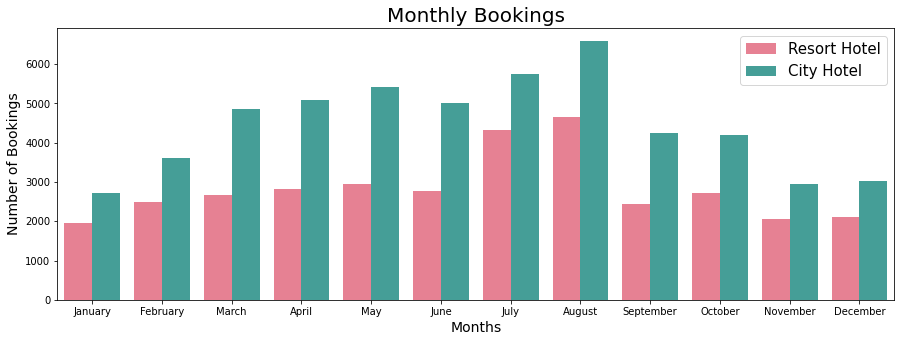

In [ ]:
#counplot for number of booking per month
plt.figure(figsize = (15, 5))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='husl').set_title ('Monthly Bookings',fontsize=20)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(prop={'size':15})

Conclusion

1 From the above bar plot we can conclude that most of the customer prefered to book and stay in hotel in May,June ,July,Auguest in both resort and city hotel hence we can say that people like to book hotel in rainy season.

2 Octomber,november,december and january months having less number of hotel booking so we can say that people does not like to stay in hotel in winter season.

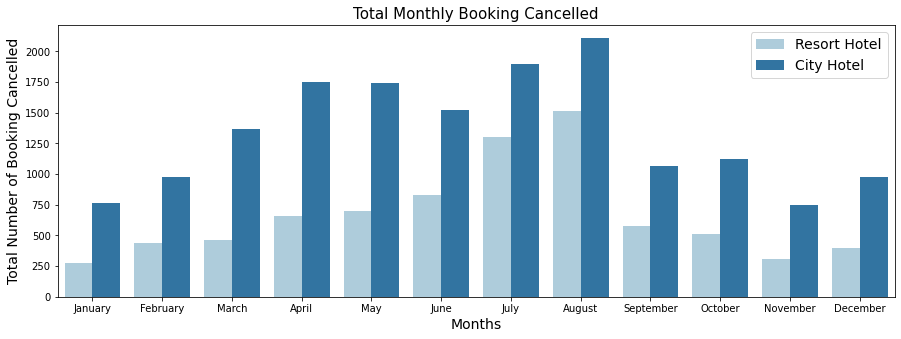

In [ ]:
#Countplot of Total number of booking Cancelled month wise 
df1=df[df['is_canceled']==1]
plt.figure(figsize = (15, 5))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='Paired').set_title ('Total Monthly Booking Cancelled',fontsize=15)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Booking Cancelled',fontsize=14)
plt.legend(prop={'size':14})

Conclusion

1 In months of april to august higher number of booking is cancelled for both resort and city hotel because most number of people book hotel in that period.

2 From september to february least number of booking have been cancled.

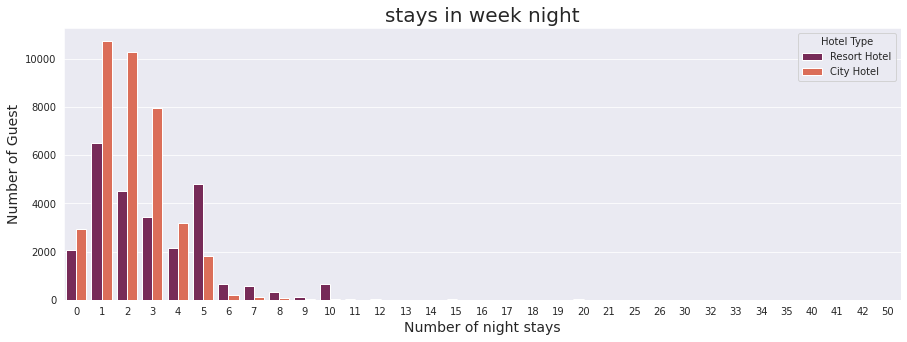

In [ ]:
df2=df[df['is_canceled']==0]
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.countplot(data = df2, x = 'stays_in_week_nights', hue='hotel', palette="rocket").set_title('stays in week night', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1,)

Conclusion

1 In week days most number of customer stay for 1 and 2 nights in both resort and city hotel.

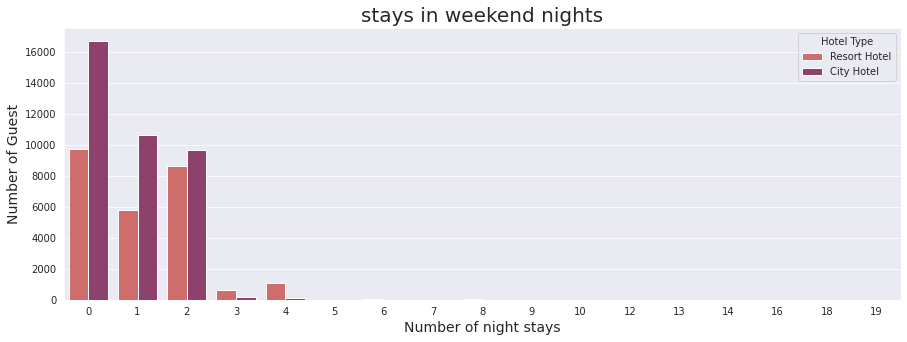

In [ ]:
#Countplot for customer stays in weekend
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.countplot(data = df2, x = 'stays_in_weekend_nights', hue='hotel', palette="flare").set_title('stays in weekend nights', fontsize =20)
plt.xlabel("Number of night stays", fontsize=14)
plt.ylabel("Number of Guest", fontsize=14)
plt.legend(title = "Hotel Type",loc = 1)

Conclusion

1 In weekend days most of the customers doesnt like to to stay in (0)nights in both resort and city hotel .

2 most of the customer stay nights in both hotels.

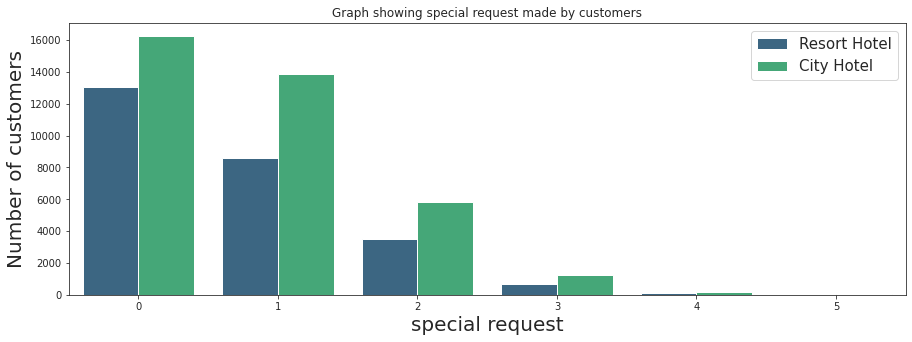

In [ ]:
#countplot for special request
sns.set_style('ticks')
plt.figure(figsize=(15,5))
sns.countplot(data = df2, x = 'total_of_special_requests', hue='hotel', palette="viridis").set_title('Graph showing special request made by customers')
plt.xlabel('special request', fontsize =20)
plt.ylabel('Number of customers', fontsize =20)
plt.legend(loc=1, prop={'size': 15})

conclusion

1 from the above countplot we can conclude that when the number of customer is higher hotel doesnot provide special request.

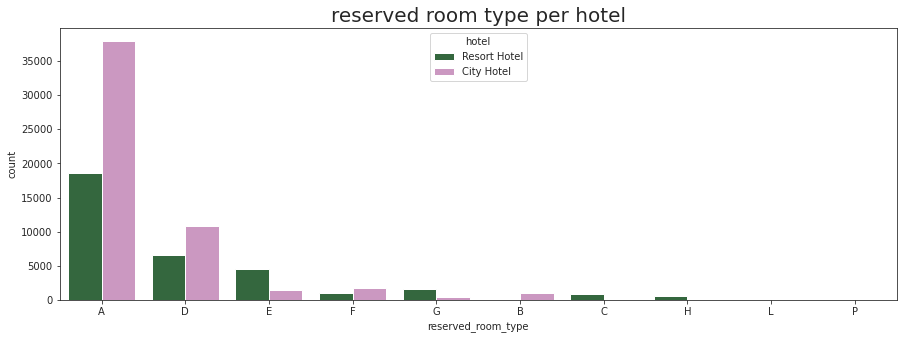

In [ ]:
#coutplot for room type
plt.figure(figsize=(15,5))
sns.countplot(x = 'reserved_room_type',
              data = df,hue='hotel',palette="cubehelix",order = df['reserved_room_type'].value_counts().index).set_title('reserved room type per hotel',y=1,fontsize=20)
plt.show()

conclusion

1.From the above bar chart we can conclude that most of the customers prefers 'A' reserved room type in city and hotel resort hotel.

2.After that room type 'D' and 'E' becomes second most room type prefered by the customers.

3.Room type 'c','H','L' ,'P' was the less prefered room type bye the customers.



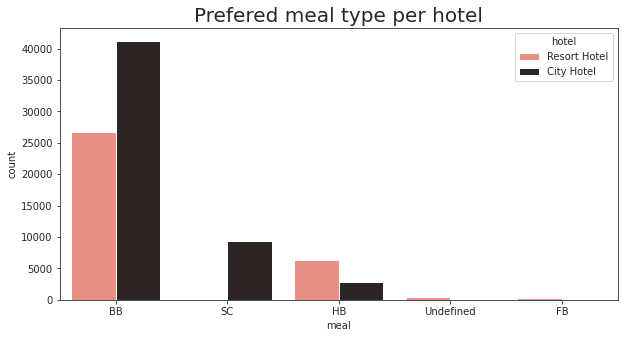

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'meal',
              data = df,hue='hotel',palette='dark:salmon_r',order = df['meal'].value_counts().index).set_title('Prefered meal type per hotel',y=1,fontsize=20)
plt.show()

Conclusion

1 BB meal was most prefered by the customer in both resort and city hotel.

2 After BB meal SC and HB meal is prefered by customers in both hotel.

SC means self-catering (no meals are included). BB means bed and breakfast. HB means half board, in which breakfast and dinner are included. FB means full board, in which breakfast, lunch and dinner are included. AI means all-inclusive, in which all meals and all drinks are included

# Lets find out following question

14.Which agent has booked most number of hotel?

15.From which country of origin our customers belongs to?

16.In which type of hotel adr is high?

17.In which hotel most of the booking was cancelled.

18.In which hotel customer like to stay for longer time?

19.In which type of hotel waiting time is high?

20.which market segment having high adr in which type of resort hotel?

21.which distribution channel having high adr in which type of resort hotel?

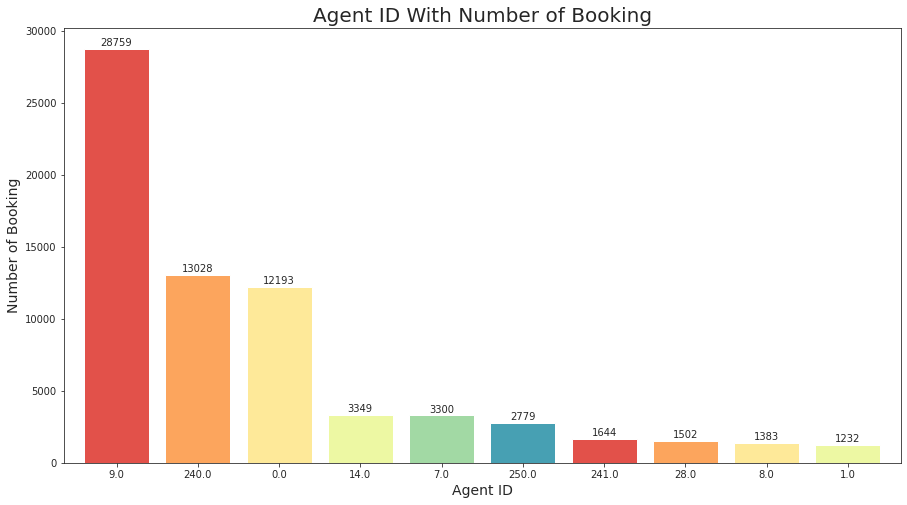

In [ ]:
#barplot for agents and their bookings
agent = df['agent'].value_counts().head(10)
plt.figure(figsize=(15,8))
ax = agent.plot(kind = 'bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title('Agent ID With Number of Booking', y=1, fontsize=20)
ax.set_xlabel('Agent ID', fontsize=14)
ax.set_ylabel('Number of Booking', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

Conclusion = Agent Wth ID 9, Book Most number of hotels

Text(0, 0.5, 'Number of Customers')

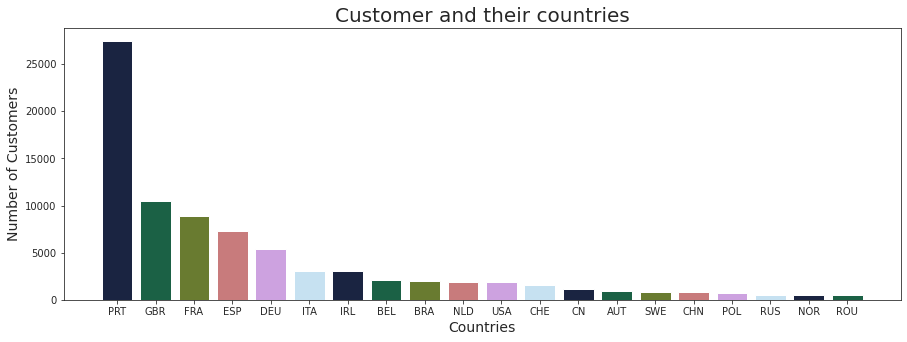

In [ ]:
#barplot of customer and their origin countries
country = dict(df['country'].value_counts())
plt.figure(figsize=(15,5))
plt.bar((list(country.keys()))[:20],(list(country.values()))[:20] ,width=0.8, color=sns.color_palette('cubehelix'))
plt.title('Customer and their countries',fontsize = 20)
plt.xlabel('Countries' ,fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

Conclusion

Most of the customer are from PRT who booked hotel arount 70%.

Some of the customers are from GBR FRA DEU ESP around 20%.

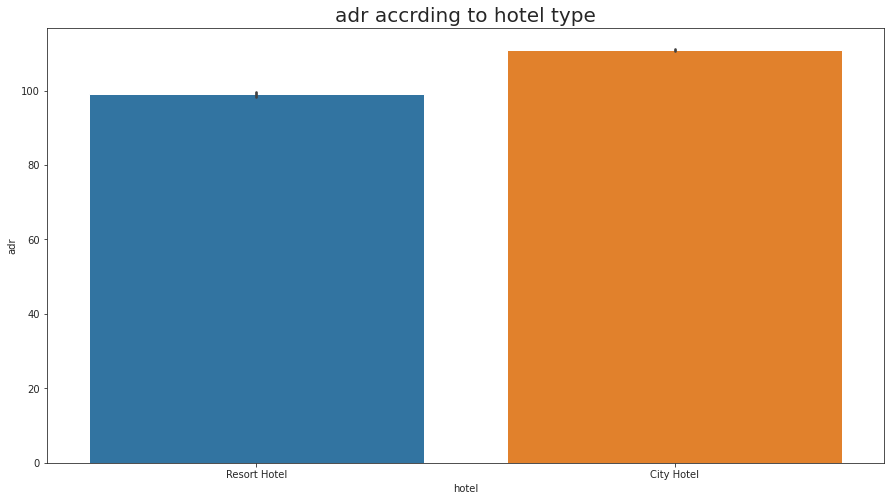

In [ ]:
#barplot of adr according to hoter type
plt.figure(figsize=(15,8))
sns.barplot(x = 'hotel',data = df,y='adr')
plt.title('adr accrding to hotel type',fontsize = 20)
              
plt.show()

Conclusion

1 from the above barplot we can say that adr of city hotel is greater that adr of resort hotel type

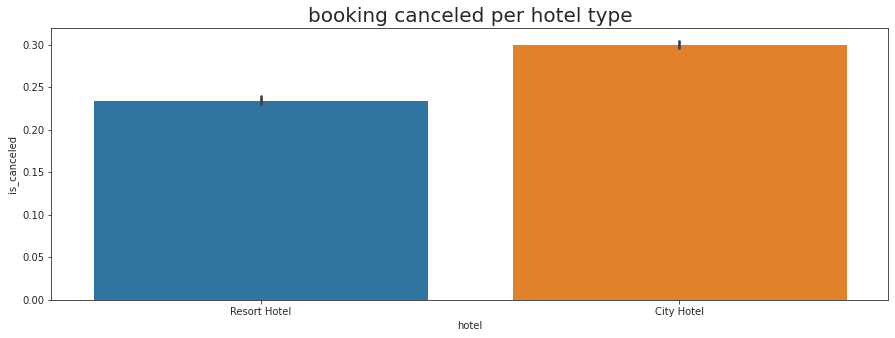

In [ ]:
#barplot of hotel according to cancelation
#barplot of lead time according to hotel
plt.figure(figsize=(15,5))
sns.barplot(x = 'hotel',
              data = df,y='is_canceled')

plt.title('booking canceled per hotel type',fontsize = 20)

plt.show()

conclusion

1 city hotel has highest booking cancelation as compared to resort hotel.

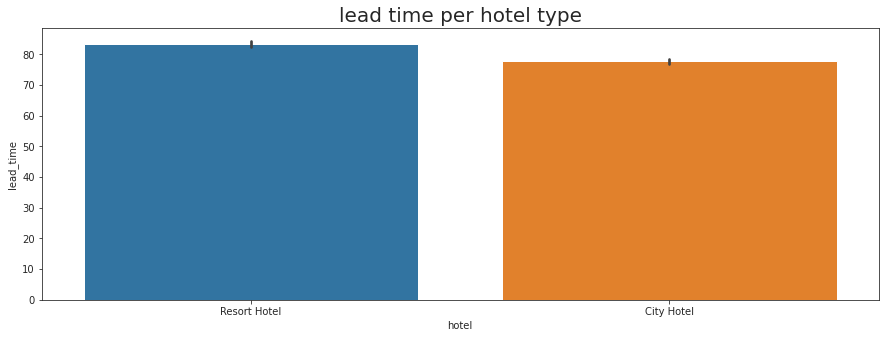

In [ ]:
#barplot of lead time according to hotel
plt.figure(figsize=(15,5))
sns.barplot(x = 'hotel',
              data = df,y='lead_time')
plt.title('lead time per hotel type',fontsize = 20)
plt.show()

Conclusion

1 Lead time of resort hotel is greater than city hotel lead time.

2 people preferd to stay for long tyme in resort hotel than city hotel

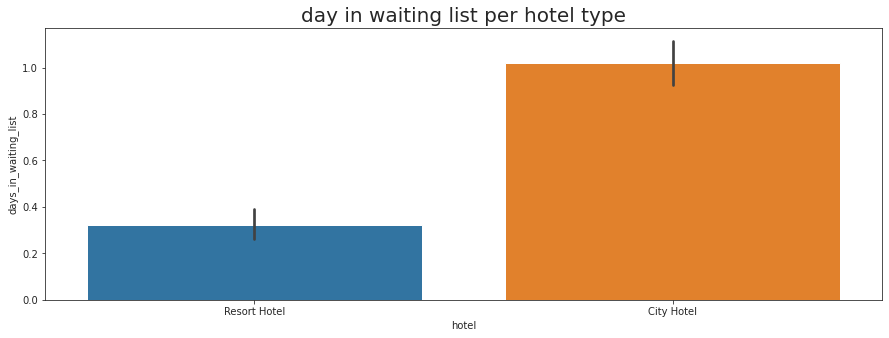

In [ ]:
#barplot of days in waiting list according to hotel
plt.figure(figsize=(15,5))
sns.barplot(x = 'hotel',
              data = df,y='days_in_waiting_list')
plt.title('day in waiting list per hotel type',fontsize = 20)
plt.show()

conclusion

city hotel has high waiting time as compared to resort hotel

Text(0.5, 1.0, 'adr per market segment')

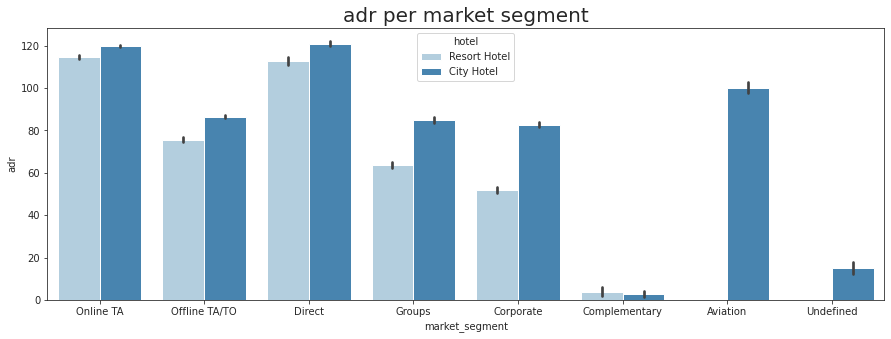

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='market_segment',y='adr' ,hue='hotel',data=df,order = df['market_segment'].value_counts().index,palette='Blues')
plt.title('adr per market segment',fontsize = 20)


Conclusion

1 from the above bar plot we can canclude online TA and direct market segmenthas highest adr than other market segments therefore it contributes mostly in the revenue earn by hotel.

2 complementry market segment has least adr as compared to other market segments therefore it contributes very less too earn revenue by hotel.

Text(0.5, 1.0, 'adr per distribution channel')

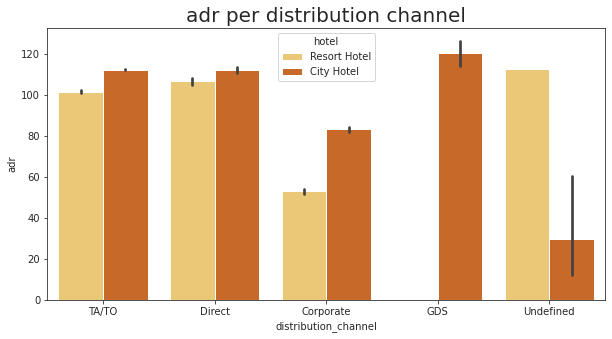

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='distribution_channel',y='adr' ,hue='hotel',data=df,order = df['distribution_channel'].value_counts().index,palette='YlOrBr')
plt.title('adr per distribution channel',fontsize = 20)


1 from the above barplot we can conclude that TA/TO and Direct distribution chanel has higher adr than all other distribution channels therefore these distribution channel contrebute higher to earn revenue for hotel.

2 Corporate has least adr therefore it contributes very less to learn revenue for hotel.

22.In which month hotels having high adr?

23.In which room type hotels having high adr?

24.Which type of customers a hotel having high adr?

25.total revenue genrated monthly by hotel?

26.what is the lead time to stay best daily rate ?

27.which variables are highly correlated with each other?

Text(0.5, 1.0, 'adr for each month')

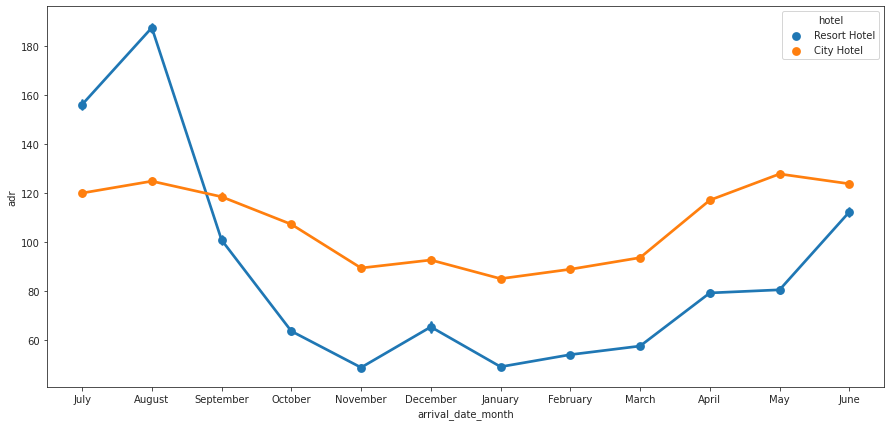

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x='arrival_date_month', y='adr', data=df, hue='hotel')
ax.set_title('adr for each month')

ADR (Average Daily Rate) ADR is used to calculate the average rental revenue per occupied room at a given time

Conclusion Resort Hotel

1.from resort hotel, ADR became higher in the moths of june to august (rainy Season)as the most customers booked hotel in that months

There is downfall in adr in the month of january(winter season) to march because the number of customers booked hotel is less in that months.
City Hotel

Adr is incressing from may to august(rainy season) soo people like to booked city hotel in that months and it will increses the avrage revenue of the hotel.
in the month of december to march (winter season)avrage revenue became very look because people does not like to book hotel in that months

Text(0.5, 1.0, 'adr for assigned room type')

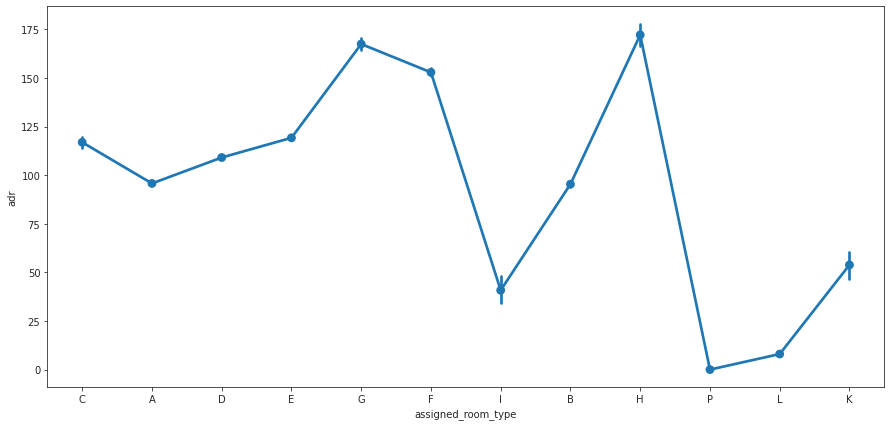

In [ ]:
#adr with respect to room type
plt.figure(figsize=(15,7))
sns.pointplot(x='assigned_room_type', y='adr', data=df)
ax.set_title('adr for assigned room type')

ADR is used to calculate the average rental revenue per occupied room at a given time

Conclusion

When the assigned room type is 'G','F' and 'H' adr of the hotel became highest it seems that these room types are costlier than other room type but customer liked to stay in that room mostly.

In case of 'P' and 'L' room type the adr of hotel becomes less it seems that this room types are less costlier than other room type also most of the people dosnt like to stay in that room type.

Text(0.5, 1.0, 'adr for assigned room type')

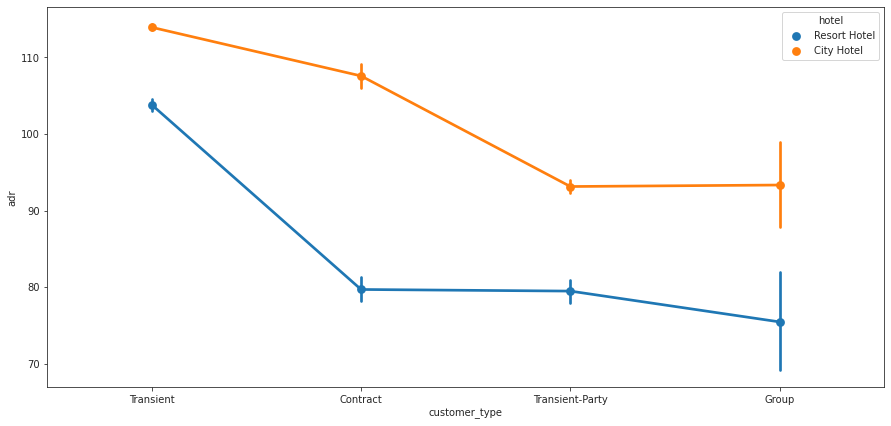

In [ ]:
#plotting point plot to see how 'customer type' affects on adr
plt.figure(figsize=(15,7))
sns.pointplot(x='customer_type', y='adr',hue='hotel', data=df)
ax.set_title('adr for assigned room type')

Transient - guest type

Transient guests are one of the major market segments an consist of individuals or groups that are occupying less than 10 rooms per night. Generally, they are walk-in guests, last minute or bookers or simply people that require a very short term stay in your facility.

Group - guest type

Groups include both leisure travelers and those traveling for business such as for a conference, convention or company meeting. The sales manager at the hotel targets this segment by putting together a package of lodging, meeting rooms and meals for the group.

contract - guest

A contract between hotel and the guest according to which hotel must provide specified room to the guest and guest must agree to pay all charges relevent to them

Conclusion

1.when the customer type is transient the adr of hotel is the highest as compared to other customer type.

2.when the customer type is contract and transient-party adr is intermidiate.

3.when the customer type is group the adr od hotel is least.

Text(0, 0.5, 'Total Revenue')

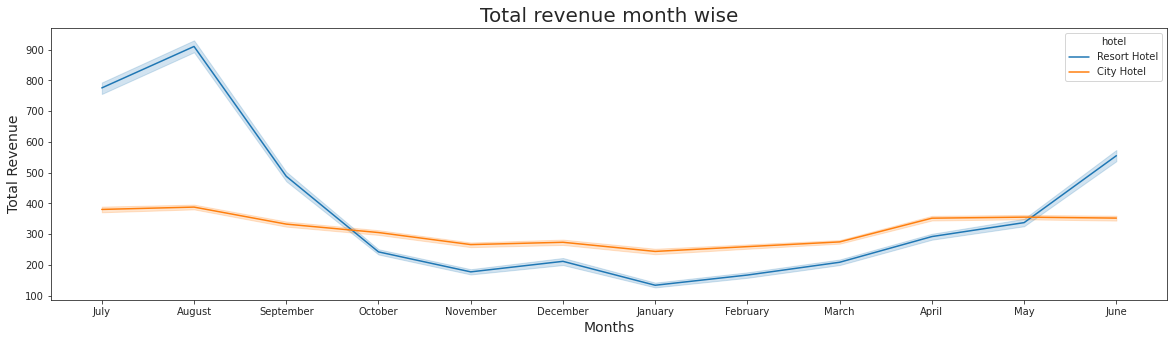

In [ ]:
#lineplot for Revenue per hotel month-wise
plt.figure(figsize=(20,5))
df2['price'] = df2['adr'] * (df2['stays_in_weekend_nights'] + df2['stays_in_week_nights'])
sns.lineplot(data = df2, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Total revenue month wise', fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Revenue',fontsize=14)

Conclusion = The revenue of resort hotel is maximum in august and lowest in january and Their is no high fluctuation in city hotel throughout year

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

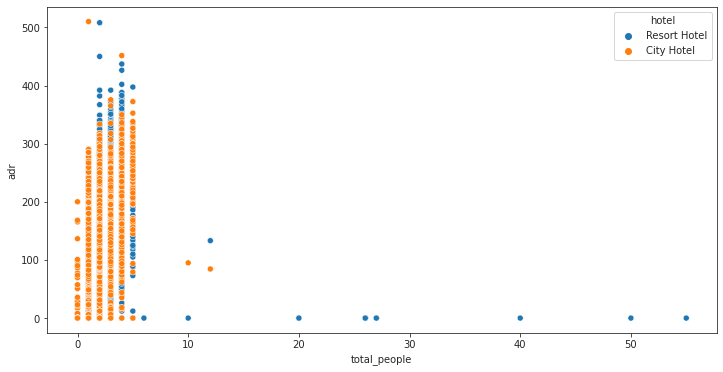

In [ ]:
#scatterplot for optimal stay length
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_people', data = df,hue='hotel')
plt.show()

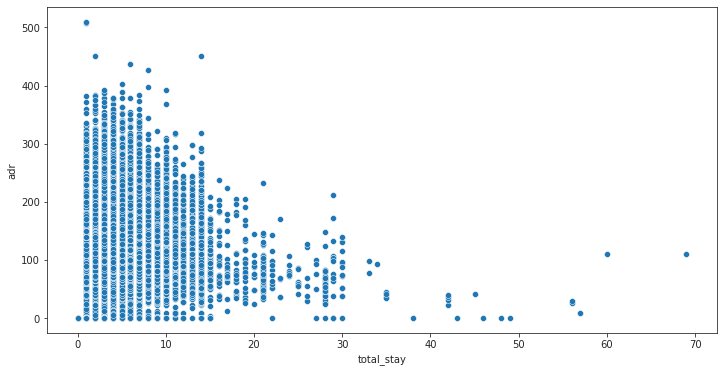

In [ ]:
#scatterplot for optimal stay length
df['total_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

Conclusion = The longer the stay length, the best price customer will get

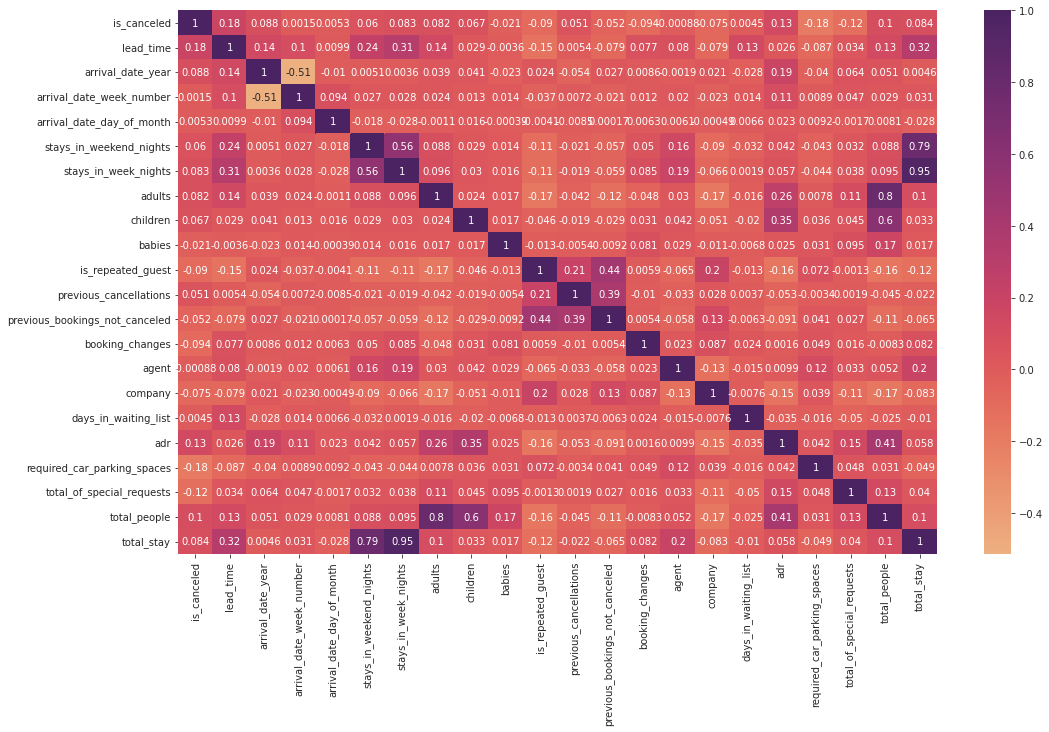

In [ ]:
#Correlation
correlation = df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(correlation, annot=True ,cmap="flare")

Conclusion

1.From the above correlation plot we can observed that total stay is highly correlated with stays_in_weekend_nights and stays_in_week_nights

2.lead tike and total stay are possitively correlated that means more is the stay of customer more will be lead time.

3.adr and total people are highly correlated that means more the people more will be adr.

4.not cacelled has strong corelation maybe repeated guest are not more likely to be cancle their booking.

In [ ]:
#dropping dataset where total people  is greater than 5
df= df.drop(df[df['total_people']>5.0].index)

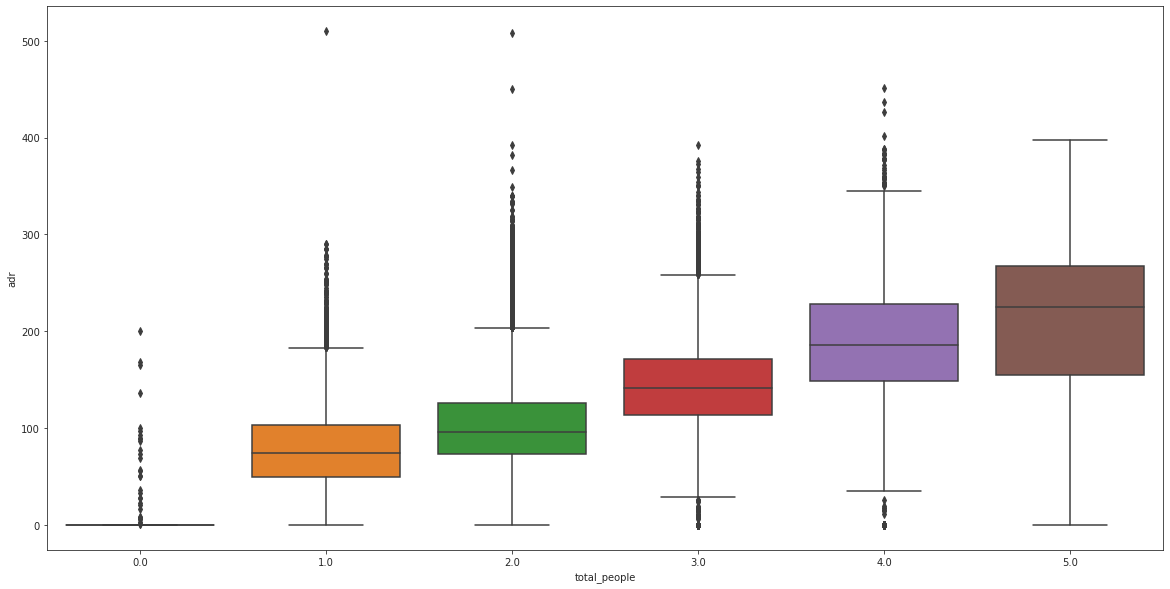

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["total_people"], y=df["adr"])

Conclusion

From the above box plot we can conclude that when the total people is 2 then adr of hotel is 100 but then the number of total people increases the adr of hotel incresses . when the total people are 5 adr will be above 200.

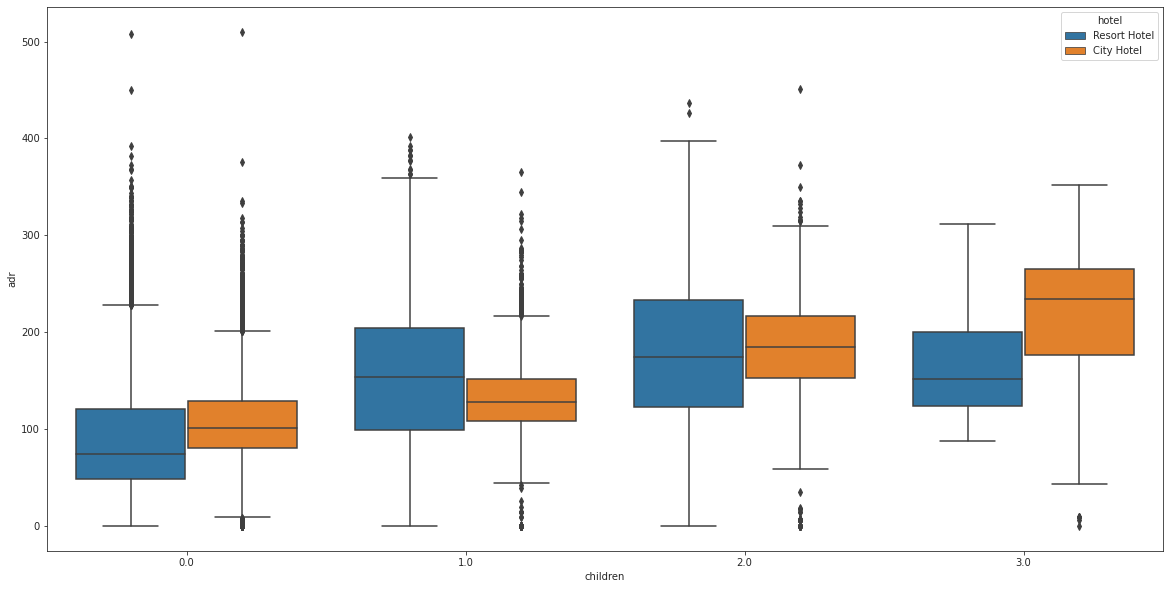

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df["children"], y=df["adr"],hue=df['hotel'])

Conclusion

from the above box plot we can conclude that if the number of children increases the adr of hotel increases.